## Пример. Случайное блуждание
Случайное блуждание — математический объект, известный как стохастический или случайный процесс, который описывает путь, состоящий из последовательности случайных шагов в каком-нибудь математическом пространстве (например, на множестве целых чисел).

Простейшим примером случайного блуждания является случайное блуждание по числовой прямой целых чисел, которое начинается в точке 0 и на каждом шаге сдвигается на +1 или на −1 с равной вероятностью.

Реализация одного случайного блуждания с 1000 шагов на чистом Python:

In [7]:
import random

def pure_py_random_walk():
    position = 0
    walk = [position]
    nsteps = 1000

    for _ in range(nsteps):
        step = 1 if random.randint(0, 1) else -1
        position += step
        walk.append(position)
    return position, walk

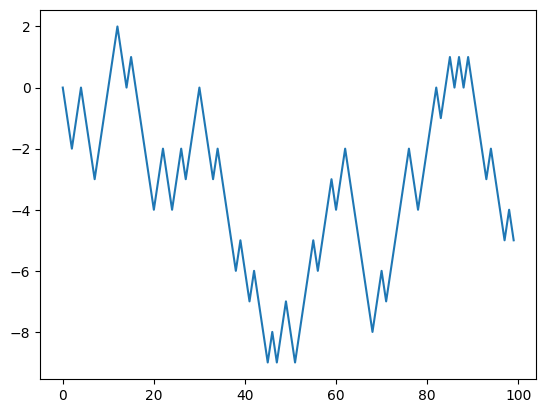

In [8]:
import matplotlib.pyplot as plt

_, walk = pure_py_random_walk()

plt.plot(walk[:100])

Теперь реализация с помощью `numpy.random`:

In [19]:
import numpy as np

rng = np.random.default_rng()

def numpy_random_walk():
    nsteps = 1000
    draws = rng.integers(0, 2, size=nsteps)
    steps = np.where(draws == 0, 1, -1)
    walk = steps.cumsum()
    
    return walk

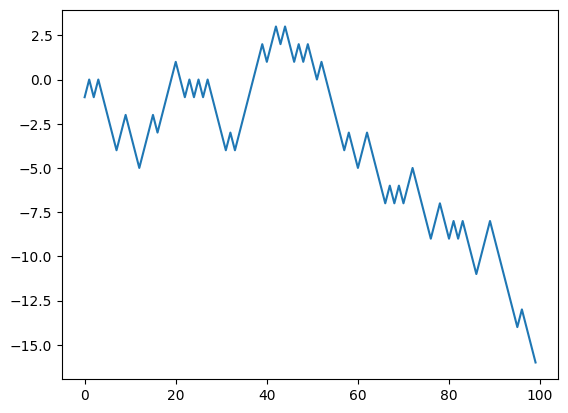

In [20]:
walk = numpy_random_walk()

plt.plot(walk[:100])